In [8]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
p = 0.01  # 1% of the lines

filename = 'historical_transactions.csv'
df_hist_trans = pd.read_csv(
         filename,
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)
df_hist_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-9,-0.738162,2017-05-17 07:03:37,1.0,16,34
1,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.743527,2017-08-01 17:41:36,1.0,16,37
2,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-6,-0.734466,2017-08-27 19:27:08,1.0,16,16
3,Y,C_ID_5037ff576e,161,N,1,B,278,M_ID_74dfc1616c,-11,-0.685299,2017-01-06 13:36:12,3.0,3,37
4,Y,C_ID_0e171c1b48,277,N,0,A,80,M_ID_ad5e2702ac,-8,-0.736389,2017-06-11 22:07:41,4.0,13,37


In [3]:
df_merchants = pd.read_csv('merchants.csv')
df_merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [4]:
df_new_merch_trans = pd.read_csv('new_merchant_transactions.csv')
df_new_merch_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


## Análisis Descriptivo
- Historical Transactions (sample)
- Merchants
- New Merchant Transactions

### Historical Transactions (sample)

In [5]:
df_hist_trans.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,291277.000000,291277.000000,291277.000000,291277.000000,291277.000000,264498.000000,291277.000000,291277.000000
mean,129.408666,0.641674,482.323719,-4.481734,-0.143598,2.197688,10.540544,26.839524
std,104.259820,1.176057,249.087052,3.592864,99.046784,1.534080,6.371451,9.704701
min,-1.000000,-1.000000,-1.000000,-13.000000,-0.746893,1.000000,-1.000000,-1.000000
25%,53.000000,0.000000,307.000000,-7.000000,-0.720161,1.000000,9.000000,19.000000
50%,90.000000,0.000000,478.000000,-4.000000,-0.688304,1.000000,9.000000,29.000000
75%,212.000000,1.000000,705.000000,-2.000000,-0.603104,3.000000,16.000000,34.000000
max,347.000000,12.000000,891.000000,0.000000,36066.233951,5.000000,24.000000,41.000000


In [6]:
print(df_hist_trans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291277 entries, 0 to 291276
Data columns (total 14 columns):
authorized_flag         291277 non-null object
card_id                 291277 non-null object
city_id                 291277 non-null int64
category_1              291277 non-null object
installments            291277 non-null int64
category_3              289514 non-null object
merchant_category_id    291277 non-null int64
merchant_id             289900 non-null object
month_lag               291277 non-null int64
purchase_amount         291277 non-null float64
purchase_date           291277 non-null object
category_2              264498 non-null float64
state_id                291277 non-null int64
subsector_id            291277 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 31.1+ MB
None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D0AD7EE80>,
      dtype=object)

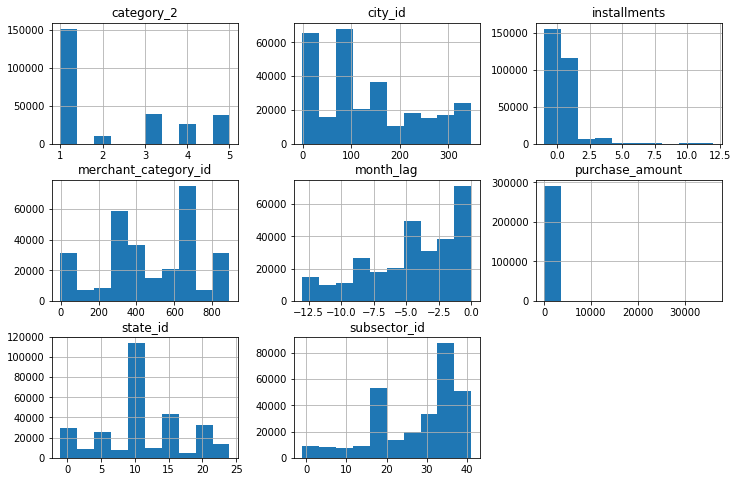

In [7]:
df_hist_trans.hist(linewidth=1.2,figsize=(12,8))

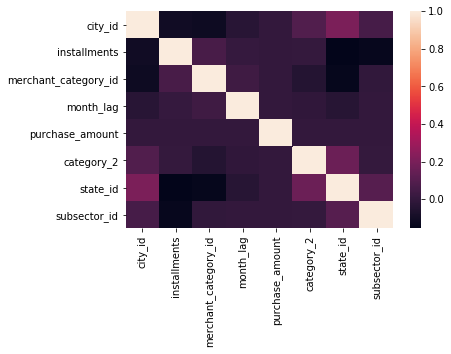

In [11]:
corr = df_hist_trans.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Merchants

In [12]:
df_merchants.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


In [13]:
print(df_merchants.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
merchant_id                    334696 non-null object
merchant_group_id              334696 non-null int64
merchant_category_id           334696 non-null int64
subsector_id                   334696 non-null int64
numerical_1                    334696 non-null float64
numerical_2                    334696 non-null float64
category_1                     334696 non-null object
most_recent_sales_range        334696 non-null object
most_recent_purchases_range    334696 non-null object
avg_sales_lag3                 334683 non-null float64
avg_purchases_lag3             334696 non-null float64
active_months_lag3             334696 non-null int64
avg_sales_lag6                 334683 non-null float64
avg_purchases_lag6             334696 non-null float64
active_months_lag6             334696 non-null int64
avg_sales_lag12                334683 non-null float64
avg_purchases_lag12    

In [15]:
#df_merchants.hist(linewidth=1.2,figsize=(12,8))


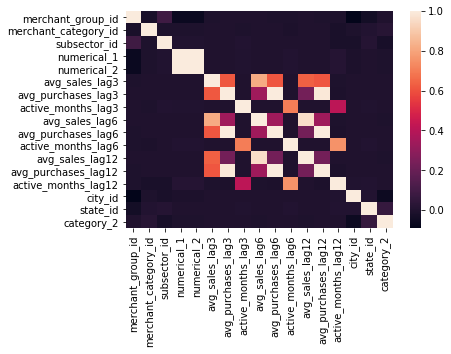

In [18]:
corr = df_merchants.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,)

### New Merchant Transactions

In [11]:
df_new_merch_trans.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.851286e+06,1.963031e+06,1.963031e+06
mean,1.343867e+02,6.829643e-01,4.309701e+02,1.476515e+00,-5.509690e-01,2.197841e+00,1.088067e+01,2.597624e+01
std,1.015152e+02,1.584069e+00,2.463385e+02,4.994483e-01,6.940043e-01,1.528125e+00,6.038542e+00,1.012908e+01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-7.468928e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,6.900000e+01,0.000000e+00,2.780000e+02,1.000000e+00,-7.166294e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,1.100000e+02,1.000000e+00,3.670000e+02,1.000000e+00,-6.748406e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,6.830000e+02,2.000000e+00,-5.816162e-01,3.000000e+00,1.500000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,2.631575e+02,5.000000e+00,2.400000e+01,4.100000e+01


In [15]:
print(df_new_merch_trans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                int64
subsector_id            int64
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB
None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D0FF17940>,
      dtype=object)

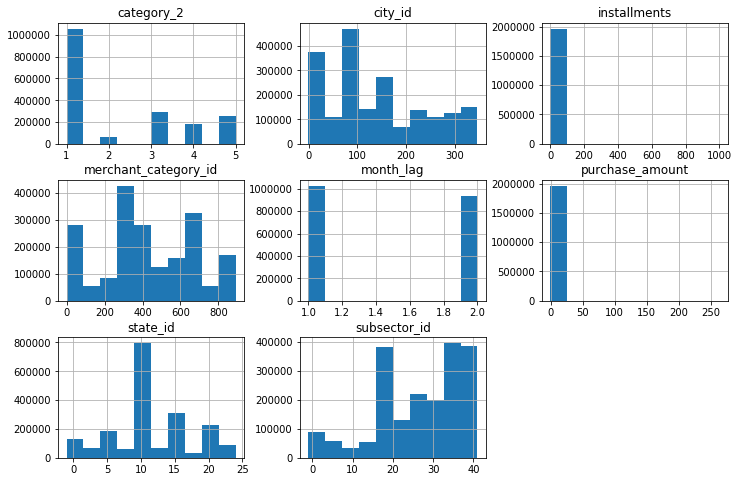

In [19]:
df_new_merch_trans.hist(linewidth=1.2,figsize=(12,8))

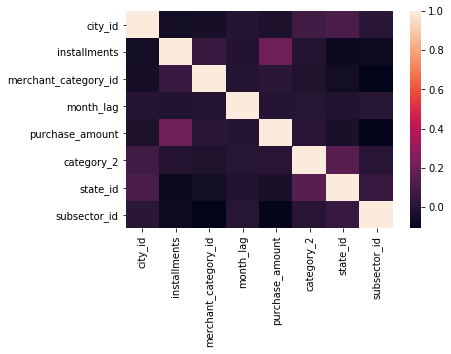

In [20]:
corr = df_new_merch_trans.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,)